<a href="https://colab.research.google.com/github/tpavan03/Phishing-Detection/blob/main/Phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("PhiUSIIIL_Phishing_URL_Dataset.csv")

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X = df.drop([ 'FILENAME','Domain','TLD','URL', 'Title','label'], axis=1)  # Drop unnecessary columns
y = df['label']
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

DECISION TREE CLASSIFIER

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt

In [27]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42,criterion="gini")

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9865895566172157
Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98     15052
         1.0       0.99      0.99      0.99     20741

    accuracy                           0.99     35793
   macro avg       0.99      0.99      0.99     35793
weighted avg       0.99      0.99      0.99     35793

Confusion Matrix:
[[14824   228]
 [  252 20489]]


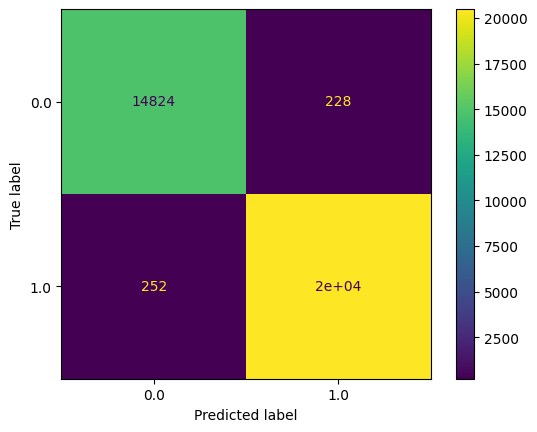

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

disp.plot()
plt.show()

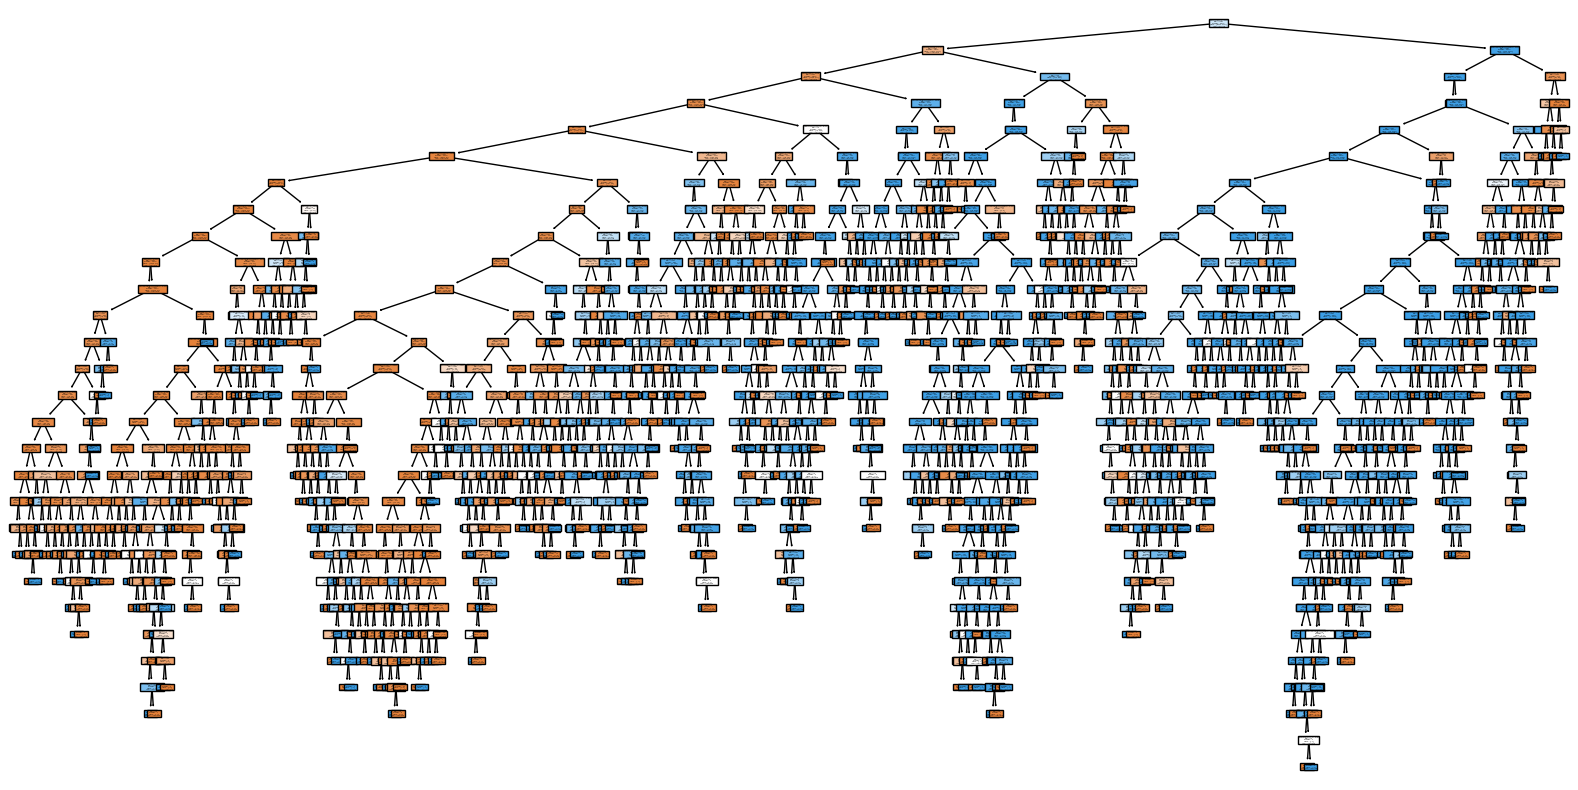

In [31]:
# Visualize the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=X.columns, class_names=['Legitimate', 'Malicious'], filled=True)
plt.show()

**RANDOM FOREST CLASSIFIER**

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
# Create and Train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make Predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the Model (same as Decision Tree example)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9928

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     15052
         1.0       0.99      1.00      0.99     20741

    accuracy                           0.99     35793
   macro avg       0.99      0.99      0.99     35793
weighted avg       0.99      0.99      0.99     35793


Confusion Matrix:
[[14886   166]
 [   92 20649]]


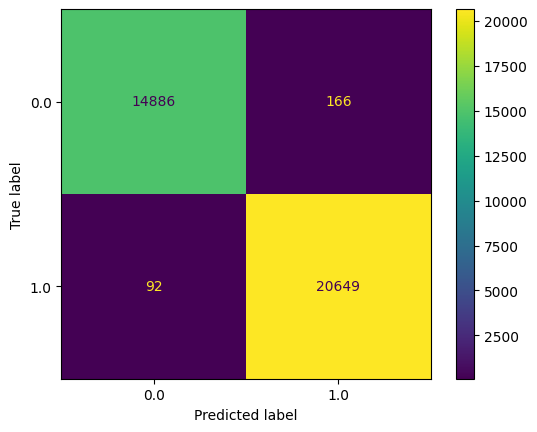

In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_classifier.classes_)

disp.plot()
plt.show()

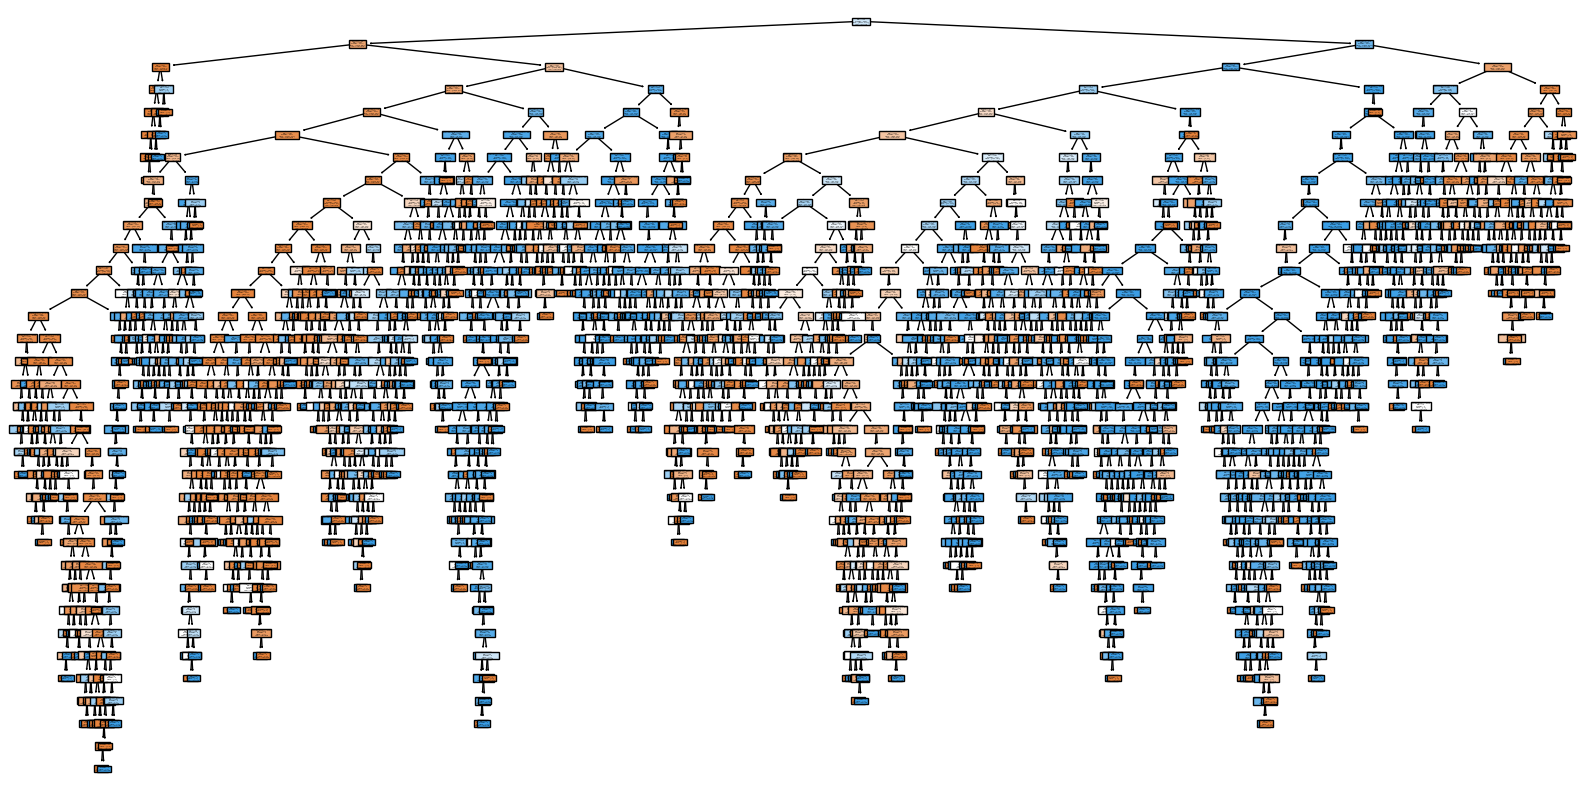

In [11]:
# Visualize the random forest
plt.figure(figsize=(20,10))
tree.plot_tree(rf_classifier.estimators_[0], feature_names=X.columns, class_names=['Legitimate', 'Malicious'], filled=True)
plt.show()

**NEURAL** **NETWORKS** **IMPLEMENTATION**

In [35]:
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

In [36]:
# Feature Scaling (Important for Neural Networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Build the Neural Network Model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # Input layer
    layers.Dense(64, activation='relu'),    # Hidden layer 1
    layers.Dense(32, activation='relu'),    # Hidden layer 2
    layers.Dense(1, activation='sigmoid')     # Output layer (sigmoid for binary classification)
])
# Compile the Model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#  Train the Model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
# Make Predictions
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)  # Convert probabilities to class labels

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Epoch 1/10
2088/2088 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9665 - loss: 0.1009 - val_accuracy: 0.9872 - val_loss: 0.0366
Epoch 2/10
2088/2088 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9884 - loss: 0.0338 - val_accuracy: 0.9903 - val_loss: 0.0288
Epoch 3/10
2088/2088 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9921 - loss: 0.0238 - val_accuracy: 0.9932 - val_loss: 0.0229
Epoch 4/10
2088/2088 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9941 - loss: 0.0175 - val_accuracy: 0.9945 - val_loss: 0.0189
Epoch 5/10
2088/2088 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9955 - loss: 0.0139 - val_accuracy: 0.9959 - val_loss: 0.0139
Epoch 6/10
2088/2088 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9969 - loss: 0.0108 - val_accuracy: 0.9970 - val_loss: 0.0111
Epoch 7/10
2088/2088 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.9972 - loss: 0.0087 - val_accuracy: 0.9953 - val_loss: 0.0142
Epoch 8/10
2088/2088 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9974 - loss: 0.008

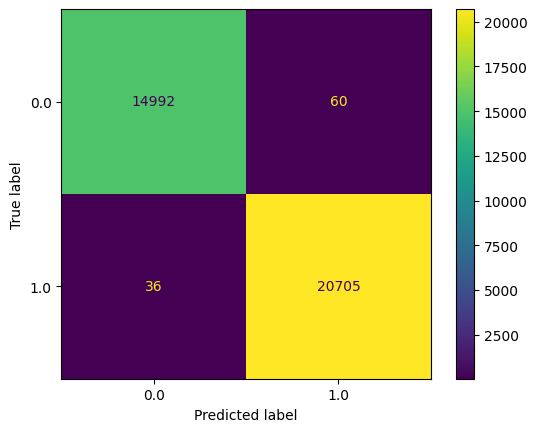

In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_classifier.classes_)

disp.plot()
plt.show()

In [18]:
# Visualise Neural Networks
!pip install pydot
!pip install graphviz
from keras.utils import plot_model

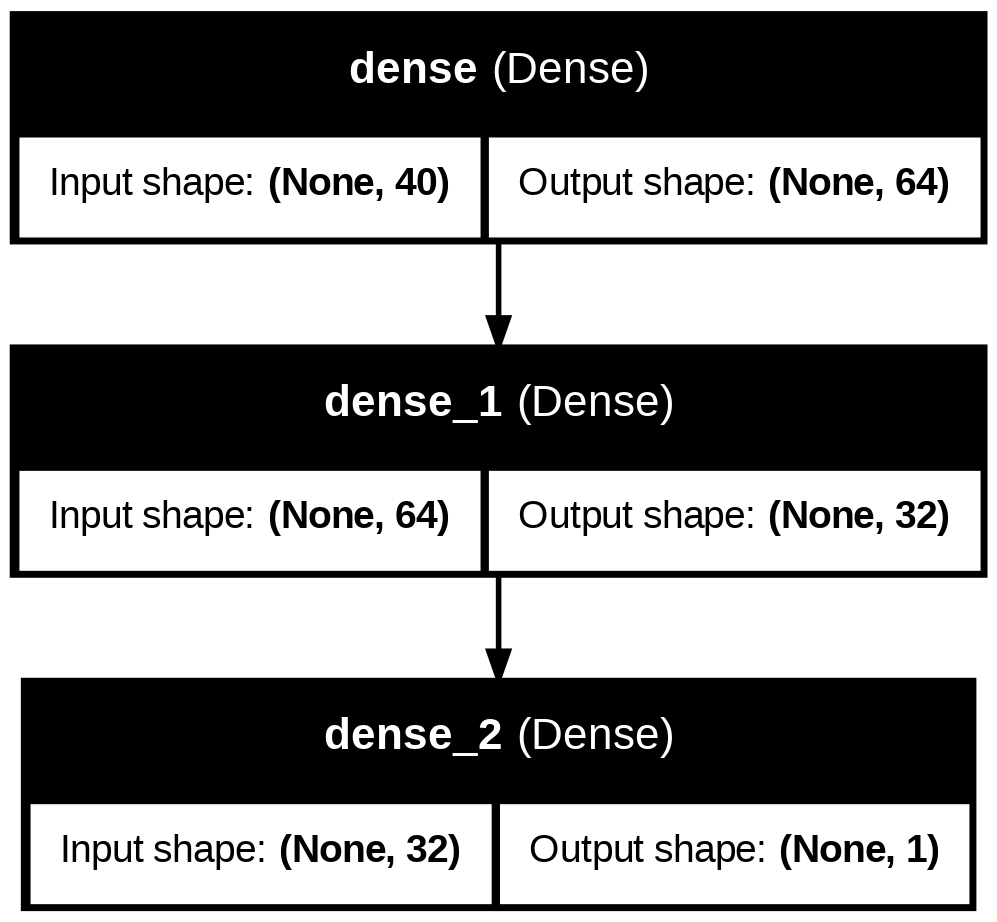

In [19]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)